<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Decision Tree

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, Applied Machine Learning in Python: a Hands-on Guide with Code, https://geostatsguy.github.io/MachineLearningDemos_Book. 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository (0.0.1). Zenodo. [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Decision Tree**. 

**YouTube Lecture**: check out my lectures on:

* [Introduction to Machine Learning](https://youtu.be/zOUM_AnI1DQ?si=wzWdJ35qJ9n8O6Bl)
* [Decision Tree](https://youtu.be/JUGo1Pu3QT4?si=ebQXv6Yglar0mYWp)
* [Random Forest](https://youtu.be/m5_wk310fho?si=up-mzVPHvniXsYE6)
* [Gradient Boosting](https://youtu.be/___T8_ixIwc?si=ozHR_eIuMF3SPTxJ)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivations for Decision Tree

Decision trees are not the most powerful, cutting edge method in machine learning, so why cover decision trees?

* one of the most understandable, interpretable predictive machine learning modeling
  
* decision trees are enhanced with random forests, bagging and boosting to be one of the best models in many cases

Machine learning method for supervised learning for classification and regression analysis. Let's cover some key aspects of decision trees.

**Prediction**

* estimate a function $\hat{f}$ such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Supervised Learning**

* the response feature label, $Y$, is available over the training and testing data
    
**Hierachical, Binary Segmentation of the Feature Space**

The fundamental idea is to divide the predictor space, $𝑋_1,\ldots,X_m$, into $J$ mutually exclusive, exhaustive regions

* **mutually exclusive** – any combination of predictors only belongs to a single region, $R_j$

* **exhaustive** – all combinations of predictors belong a region, $R_j$, regions cover entire feature space (range of the variables being considered)

For every observation in a region, $R_j$, we use the same prediction, $\hat{Y}(R_j)$    

For example predict production, $\hat{Y}$, from porosity, ${X_1}$

* given the data within a mD feature space, $X_1,\ldots,X_m$, find that boundary maximizes the gap between the two categories

* new cases are classified based on where they fall relative to this boundary 

**Compact, Interpretable Model**

Since the classification is based on a hierarchy of binary segmentations of the feature space (one feature at a time) the model can be specified in a intuitive manner as a:

* **tree with binary branches**, hence the name decision tree

* **set of nested if statements**, for example:

```python
if porosity > 0.15:
    if brittleness < 20:
        initial_production = 1000
    else:
        initial_production = 7000
else:
    if brittleness < 40:
        initial_production = 500
    else:
        initial_production = 3000
```

* **predicts with the average of training response features** in each region $\hat{Y}(R_j)$.   

**Procedure for Tree Construction**

The tree is constructed from the top down. We begin with a single region that covers the entire feature space and then proceed with a sequence of splits.

* **Scan All Possible Splits** over all regions and over all features.

* **Greedy Optimization**  The method proceeds by finding the first segmentation (split) in any feature that minimizes the residual sum of squares of errors over all the training data $y_i$ over all of the regions $j = 1,\ldots,J$.

$$
RSS = \sum^{J}_{j=1} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2
$$

* **Stopping Criteria** is typically based on minimum number of training data in each region for a robust estimation and / or minimum reduction in RSS for the next split 

#### Load the Required Libraries

We will also need some standard packages. These should have been installed with Anaconda 3.

In [3]:
%matplotlib inline                                         
suppress_warnings = True
import os                                                     # to set current working directory 
import math                                                   # square root operator
import numpy as np                                            # arrays and matrix math
import scipy.stats as st                                      # statistical methods
import pandas as pd                                           # DataFrames
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator,AutoMinorLocator,FuncFormatter) # control of axes ticks
from matplotlib.colors import ListedColormap                  # custom color maps
import seaborn as sns                                         # for matrix scatter plots
from sklearn import tree                                      # tree program from scikit learn (package for machine learning)
from sklearn.tree import _tree                                # for accessing tree information
from sklearn import metrics                                   # measures to check our models
from sklearn.preprocessing import StandardScaler              # standardize the features
from sklearn.tree import export_graphviz                      # graphical visualization of trees
from sklearn.model_selection import (cross_val_score,train_test_split,GridSearchCV,KFold) # model tuning
from sklearn.pipeline import (Pipeline,make_pipeline)         # machine learning modeling pipeline
from sklearn import metrics                                   # measures to check our models
from sklearn.model_selection import cross_val_score           # multi-processor K-fold crossvalidation
from sklearn.model_selection import train_test_split          # train and test split
from IPython.display import display, HTML                     # custom displays
cmap = plt.cm.inferno                                         # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                                # grid behind plotting elements
if suppress_warnings == True:  
    import warnings                                           # supress any warnings for this demonstration
    warnings.filterwarnings('ignore') 
seed = 13                                                     # random number seed for workflow repeatability

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [5]:
def comma_format(x, pos):
    return f'{int(x):,}'

def feature_rank_plot(pred,metric,mmin,mmax,nominal,title,ylabel,mask): # feature ranking plot
    mpred = len(pred); mask_low = nominal-mask*(nominal-mmin); mask_high = nominal+mask*(mmax-nominal); m = len(pred) + 1
    plt.plot(pred,metric,color='black',zorder=20)
    plt.scatter(pred,metric,marker='o',s=10,color='black',zorder=100)
    plt.plot([-0.5,m-1.5],[0.0,0.0],'r--',linewidth = 1.0,zorder=1)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric < nominal),interpolate=True,color='dodgerblue',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.zeros(mpred),metric,where=(metric > nominal),interpolate=True,color='lightcoral',alpha=0.3)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_low),metric,where=(metric < mask_low),interpolate=True,color='blue',alpha=0.8,zorder=10)
    plt.fill_between(np.arange(0,mpred,1),np.full(mpred,mask_high),metric,where=(metric > mask_high),interpolate=True,color='red',alpha=0.8,zorder=10)  
    plt.xlabel('Predictor Features'); plt.ylabel(ylabel); plt.title(title)
    plt.ylim(mmin,mmax); plt.xlim([-0.5,m-1.5]); add_grid();
    return

def plot_corr(corr_matrix,title,limits,mask):                 # plots a graphical correlation matrix 
    my_colormap = plt.get_cmap('RdBu_r', 256)          
    newcolors = my_colormap(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    white_low = int(128 - mask*128); white_high = int(128+mask*128)
    newcolors[white_low:white_high, :] = white                # mask all correlations less than abs(0.8)
    newcmp = ListedColormap(newcolors)
    m = corr_matrix.shape[0]
    im = plt.matshow(corr_matrix,fignum=0,vmin = -1.0*limits, vmax = limits,cmap = newcmp)
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns); ax = plt.gca()
    ax.xaxis.set_label_position('bottom'); ax.xaxis.tick_bottom()
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.colorbar(im, orientation = 'vertical')
    plt.title(title)
    for i in range(0,m):
        plt.plot([i-0.5,i-0.5],[-0.5,m-0.5],color='black')
        plt.plot([-0.5,m-0.5],[i-0.5,i-0.5],color='black')
    plt.ylim([-0.5,m-0.5]); plt.xlim([-0.5,m-0.5])
    
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

def plot_CDF(data,color,alpha=1.0,lw=1,ls='solid',label='none'):
    cumprob = (np.linspace(1,len(data),len(data)))/(len(data)+1)
    plt.scatter(np.sort(data),cumprob,c=color,alpha=alpha,edgecolor='black',lw=lw,ls=ls,label=label,zorder=10)
    plt.plot(np.sort(data),cumprob,c=color,alpha=alpha,lw=lw,ls=ls,zorder=8)

def extract_rules(tree_model, feature_names):                 # recursive method to extract rules, from paulkernfeld Stack Overflow (?)
    rules = []
    def traverse(node, depth, prev_rule):
        if tree_model.tree_.children_left[node] == -1:        # Leaf node
            class_label = np.argmax(tree_model.tree_.value[node])
            rule = f"{prev_rule} => Class {class_label}"
            rules.append(rule)
        else:  # Split node
            feature = feature_names[tree_model.tree_.feature[node]]
            threshold = tree_model.tree_.threshold[node]
            left_child = tree_model.tree_.children_left[node]
            right_child = tree_model.tree_.children_right[node]
            traverse(left_child, depth + 1, f"{prev_rule} & {feature} <= {threshold}") # Recursively traverse left and right subtrees
            traverse(right_child, depth + 1, f"{prev_rule} & {feature} > {threshold}")
    traverse(0, 0, "Root")
    return rules

def plot_decision_tree_regions(tree_model, feature_names,X_min,X_max,annotate=True):
    rules = extract_rules(tree_model, feature_names)
    for irule, ____ in enumerate(rules):
        rule = rules[irule].split()[2:]
        X_min = Xmin[0]; X_max = Xmax[0]; Y_min = Xmin[1]; Y_max = Xmax[1];
        index = [i for i,val in enumerate(rule) if val==feature_names[0]]
        for i in index:
            if rule[i+1] == '<=':
                X_max = min(float(rule[i+2]),X_max)
            else:
                X_min = max(float(rule[i+2]),X_min)
        index = [i for i,val in enumerate(rule) if val==feature_names[1]]
        for i in index:
            if rule[i+1] == '<=':
                Y_max = min(float(rule[i+2]),Y_max)
            else:
                Y_min = max(float(rule[i+2]),Y_min) 
        plt.gca().add_patch(plt.Rectangle((X_min,Y_min),X_max-X_min,Y_max-Y_min, lw=2,ec='black',fc="none"))
        cx = (X_min + X_max)*0.5; cy = (Y_min + Y_max)*0.5; loc = np.array((cx,cy)).reshape(1, -1)
        if annotate == True:
            plt.annotate(text = str(f'{np.round(tree_model.predict(loc)[0],2):,.0f}'),xy=(cx,cy),ha='center',
                         weight='bold',c='white',zorder=100)

def visualize_tree_model(model,X1_train,X1_test,X2_train,X2_test,Xmin,Xmax,y_train,y_test,ymin,
                         ymax,title,Xname,yname,Xlabel,ylabel,annotate=True):# plots the data points and the decision tree prediction 
    cmap = plt.cm.inferno
    X1plot_step = (Xmax[0] - Xmin[0])/300.0; X2plot_step = -1*(Xmax[1] - Xmin[1])/300.0 # resolution of the model visualization
    XX1, XX2 = np.meshgrid(np.arange(Xmin[0], Xmax[0], X1plot_step), # set up the mesh
                     np.arange(Xmax[1], Xmin[1], X2plot_step))
    y_hat = model.predict(np.c_[XX1.ravel(), XX2.ravel()])    # predict with our trained model over the mesh
    y_hat = y_hat.reshape(XX1.shape)

    plt.imshow(y_hat,interpolation=None, aspect="auto", extent=[Xmin[0],Xmax[0],Xmin[1],Xmax[1]], 
        vmin=ymin,vmax=ymax,alpha = 0.2,cmap=cmap,zorder=1)
    sp = plt.scatter(X1_train,X2_train,s=None, c=y_train, marker='o', cmap=cmap, 
        norm=None, vmin=ymin, vmax=ymax, alpha=0.6, linewidths=0.3, edgecolors="black", label = 'Train',zorder=10)
    plt.scatter(X1_test,X2_test,s=None, c=y_test, marker='s', cmap=cmap, 
        norm=None, vmin=ymin, vmax=ymax, alpha=0.3, linewidths=0.3, edgecolors="black", label = 'Test',zorder=10)

    plot_decision_tree_regions(model,Xname,Xmin,Xmax,annotate)
    plt.title(title); plt.xlabel(Xlabel[0]); plt.ylabel(Xlabel[1])
    plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])
    cbar = plt.colorbar(sp, orientation = 'vertical')         # add the color bar
    cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
    cbar.set_label(ylabel, rotation=270, labelpad=20)
    return y_hat

def check_tree_model(model,X1_train,X1_test,X2_train,X2_test,Xmin,Xmax,y_train,y_test,ymin,ymax,title): # plots the estimated vs. the actual  
    y_hat_train = model.predict(np.c_[X1_train,X2_train]); y_hat_test = model.predict(np.c_[X1_test,X2_test])

    df_cross = pd.DataFrame(np.c_[y_test,y_hat_test],columns=['y_test','y_hat_test'])
    df_cross_train = pd.DataFrame(np.c_[y_train,y_hat_train],columns=['y_train','y_hat_train'])

    plt.scatter(y_train,y_hat_train,s=15, c='blue',marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=0.7, 
                linewidths=0.3, edgecolors="black",label='Train',zorder=10)
    plt.scatter(y_test,y_hat_test,s=15, c='red',marker='s', cmap=None, norm=None, vmin=None, vmax=None, alpha=0.7, 
                linewidths=0.3, edgecolors="black",label='Test',zorder=10)

    unique_y_hat_all = set(np.concatenate([y_hat_test,y_hat_train]))
    for y_hat in unique_y_hat_all:
        plt.plot([ymin,ymax],[y_hat,y_hat],c='black',alpha=0.2,ls='--',zorder=1)
        
    unique_y_hat_test = set(y_hat_test)
    for y_hat in unique_y_hat_test:
        #plt.plot([ymin,ymax],[y_hat,y_hat],c='black',alpha=0.3,ls='--',zorder=1)
        cond_mean_y_hat = df_cross.loc[df_cross['y_hat_test'] == y_hat, 'y_test'].mean()
        cond_P75_y_hat = df_cross.loc[df_cross['y_hat_test'] == y_hat, 'y_test'].quantile(0.75)
        cond_P25_y_hat = df_cross.loc[df_cross['y_hat_test'] == y_hat, 'y_test'].quantile(0.25)
        plt.scatter(cond_mean_y_hat,y_hat-0.02*(ymax-ymin),color='red',edgecolor='black',s=60,marker='^',zorder=100)
        plt.plot([cond_P25_y_hat,cond_P75_y_hat],[y_hat-0.025*(ymax-ymin),y_hat-0.025*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P25_y_hat,cond_P25_y_hat],[y_hat-0.032*(ymax-ymin),y_hat-0.018*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P75_y_hat,cond_P75_y_hat],[y_hat-0.032*(ymax-ymin),y_hat-0.018*(ymax-ymin)],c='black',lw=0.7)
        
    unique_y_hat_train = set(y_hat_train)
    for y_hat in unique_y_hat_train:
        #plt.plot([ymin,ymax],[y_hat,y_hat],c='black',alpha=0.3,ls='--',zorder=1)
        cond_mean_y_hat = df_cross_train.loc[df_cross_train['y_hat_train'] == y_hat, 'y_train'].mean()
        cond_P75_y_hat = df_cross_train.loc[df_cross_train['y_hat_train'] == y_hat, 'y_train'].quantile(0.75)
        cond_P25_y_hat = df_cross_train.loc[df_cross_train['y_hat_train'] == y_hat, 'y_train'].quantile(0.25)
        plt.scatter(cond_mean_y_hat,y_hat+0.02*(ymax-ymin),color='blue',edgecolor='black',s=60,marker='v',zorder=100)
        plt.plot([cond_P25_y_hat,cond_P75_y_hat],[y_hat+0.025*(ymax-ymin),y_hat+0.025*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P25_y_hat,cond_P25_y_hat],[y_hat+0.032*(ymax-ymin),y_hat+0.018*(ymax-ymin)],c='black',lw=0.7)
        plt.plot([cond_P75_y_hat,cond_P75_y_hat],[y_hat+0.032*(ymax-ymin),y_hat+0.018*(ymax-ymin)],c='black',lw=0.7)
        
    plt.title(title); plt.xlabel('Actual Production (MCFPD)'); plt.ylabel('Estimated Production (MCFPD)')
    plt.xlim([ymin,ymax]); plt.ylim([ymin,ymax]); plt.legend(loc='upper left')
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

    plt.arrow(ymin,ymin,ymax,ymax,width=0.02,color='black',head_length=0.0,head_width=0.0)
    MSE_train = metrics.mean_squared_error(y_train,y_hat_train); MSE_test = metrics.mean_squared_error(y_test,y_hat_test)
    plt.gca().add_patch(plt.Rectangle((ymin+0.6*(ymax-ymin),ymin+0.1*(ymax-ymin)),0.40*(ymax-ymin),0.12*(ymax-ymin),
        lw=0.5,ec='black',fc="white",zorder=100))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
    plt.annotate('MSE Testing:  ' + str(f'{np.round(MSE_test,2):,.0f}'),(ymin+0.62*(ymax-ymin),ymin+0.18*(ymax-ymin)),zorder=1000)
    plt.annotate('MSE Training: ' + str(f'{np.round(MSE_train,2):,.0f}'),(ymin+0.62*(ymax-ymin),ymin+0.12*(ymax-ymin)),zorder=1000)
    
def tree_tuning(node_max,cnode,X1_train,X1_test,X2_train,X2_test,Xmin,Xmax,y_train,y_test,ymin,ymax,title,seed):
    MSE_test_mat = np.zeros(node_max-1); MSE_train_mat = np.zeros(node_max-1);
    
    for imax_leaf_node, max_leaf_node in enumerate(range(2,node_max+1)):
        np.random.seed(seed = seed)
        tree_temp = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_node)
        tree_temp = tree_temp.fit(X_train.values, y_train.values)
        y_hat_train = tree_temp.predict(np.c_[X1_train,X2_train]); y_hat_test = tree_temp.predict(np.c_[X1_test,X2_test])  
        MSE_train_mat[imax_leaf_node] = metrics.mean_squared_error(y_train,y_hat_train)
        MSE_test_mat[imax_leaf_node] = metrics.mean_squared_error(y_test,y_hat_test)
        if max_leaf_node == cnode:
            plt.scatter(cnode,MSE_train_mat[imax_leaf_node],color='blue',edgecolor='black',s=20,marker='o',zorder=1000)
            plt.scatter(cnode,MSE_test_mat[imax_leaf_node],color='red',edgecolor='black',s=20,marker='o',zorder=1000)
    maxcheck = max(np.max(MSE_train_mat),np.max(MSE_test_mat))
    
    plt.vlines(cnode,0,maxcheck,color='black',ls='--',lw=1,zorder=1) 
    plt.plot(range(2,node_max+1),MSE_train_mat,color='blue',zorder=100,label='Train')
    plt.plot(range(2,node_max+1),MSE_test_mat,color='red',zorder=100,label='Test')
    
    plt.title(title); plt.xlabel('Maximum Number of Leaf Nodes'); plt.ylabel('Means Square Error')
    plt.xlim([0,node_max]); plt.ylim([0,maxcheck]); plt.legend(loc='upper right')
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

def tree_to_code(tree, feature_names):                        # code from StackOverFlow by paulkernfeld
    tree_ = tree.tree_                                        # convert tree object to portable code to use anywhere
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}elif {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))
    recurse(0, 1) 

def get_lineage(tree, feature_names):                         # code from StackOverFlow by Zelanzny7
    left      = tree.tree_.children_left                      # track the decision path for any set of inputs
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    # get ids of child nodes
    idx = np.argwhere(left == -1)[:,0]     
    def recurse(left, right, child, lineage=None):          
        if lineage is None:
            lineage = [child]
        if child in left:
            parent = np.where(left == child)[0].item()
            split = 'l'
        else:
            parent = np.where(right == child)[0].item()
            split = 'r'
        lineage.append((parent, split, threshold[parent], features[parent]))
        if parent == 0:
            lineage.reverse()
            return lineage
        else:
            return recurse(left, right, parent, lineage)
    for child in idx:
        for node in recurse(left, right, child):
            print(node) 

def display_sidebyside(*args):                                # display DataFrames side-by-side (ChatGPT 4.0 generated Spet, 2024)
    html_str = ''
    for df in args:
        html_str += df.head().to_html()  # Using .head() for the first few rows
    display(HTML(f'<div style="display: flex;">{html_str}</div>'))

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).

In [7]:
#os.chdir("c:/PGE383")                                        # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Loading Data

Let's load the provided multivariate, spatial dataset [unconv_MV.csv](https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv) available in my GeoDataSet repo. It is a comma delimited file with: 

* well index (integer)
* porosity (%)
* permeability ($mD$)
* acoustic impedance ($\frac{kg}{m^3} \cdot \frac{m}{s} \cdot 10^6$).
* brittleness (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial gas production (90 day average) (MCFPD)

We load it with the pandas 'read_csv' function into a data frame we called 'df' and then preview it to make sure it loaded correctly.

**Python Tip: using functions from a package** just type the label for the package that we declared at the beginning:

```python
import pandas as pd
```

so we can access the pandas function 'read_csv' with the command: 

```python
pd.read_csv()
```

but read csv has required input parameters. The essential one is the name of the file. For our circumstance all the other default parameters are fine. If you want to see all the possible parameters for this function, just go to the docs [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).  

* The docs are always helpful
* There is often a lot of flexibility for Python functions, possible through using various inputs parameters

also, the program has an output, a pandas DataFrame loaded from the data.  So we have to specify the name / variable representing that new object.

```python
df = pd.read_csv("unconv_MV.csv")  
```

Let's run this command to load the data and then this command to extract a random subset of the data.

```python
df = df.sample(frac=.30, random_state = 73073); 
df = df.reset_index()
```

#### Feature Engineering

Let's make some changes to the data to improve the workflow:

* **Select the predictor features (x2) and the response feature (x1)**, make sure the metadata is also consistent.
* **Metadata** encoding such as the units, labels and display ranges for each feature.
* **Reduce the number of data** for ease of visualization (hard to see if too many points on our plots).
* **Train and test data split** to demonstrate and visualize simple hyperparameter tuning.
* **Add random noise to the data** to demonstrate model overfit. The original data is error free and does not readily demonstrate overfit.

Given this is properly set, one should be able to use any dataset and features for this demonstration. 

* for brevity we don't show any feature selection here. Previous chapter, e.g., k-nearest neighbours include some feature selection methods, but see the feature selection chapter for many possible methods with codes for feature selection.

#### Optional: Add Random Noise to the Response Feature

We can do this to observe the impact of data noise on overfit and hyperparameter tuning.

* This is for experiential learning, of course we wouldn't add random noise to our data
* We set the random number seed for reproducibility

In [9]:
add_error = True                                              # add random error to the response feature
std_error = 500                                               # standard deviation of random error, for demonstration only
idata = 2

if idata == 1:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load the data from my github repo
    df_load = df_load.sample(frac=.30, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    
elif idata == 2:
    df_load = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v5.csv") # load the data 
    df_load = df_load.sample(frac=.70, random_state = seed); df_load = df_load.reset_index() # extract 30% random to reduce the number of data
    df_load = df_load.rename(columns={"Prod": "Production"})
    
yname = 'Production'; Xname = ['Por','Brittle']               # specify the predictor features (x2) and response feature (x1)
Xmin = [5.0,0.0]; Xmax = [25.0,100.0]                         # set minimums and maximums for visualization 
ymin = 1000.0; ymax = 9000.0
Xlabel = ['Porosity','Brittleness']; ylabel = 'Production'    # specify the feature labels for plotting
Xunit = ['%','%']; yunit = 'MCFPD'
Xlabelunit = [Xlabel[0] + ' (' + Xunit[0] + ')',Xlabel[1] + ' (' + Xunit[1] + ')']
ylabelunit = ylabel + ' (' + yunit + ')'

if add_error == True:                                         # method to add error
    np.random.seed(seed=seed)                                 # set random number seed
    df_load[yname] = df_load[yname] + np.random.normal(loc = 0.0,scale=std_error,size=len(df_load)) # add noise
    values = df_load._get_numeric_data(); values[values < 0] = 0   # set negative to 0 in a shallow copy ndarray
    
y = pd.DataFrame(df_load[yname])                              # extract selected features as X and y DataFrames
X = df_load[Xname]
df = pd.concat([X,y],axis=1)                                  # make one DataFrame with both X and y (remove all other features)

Let's make sure that we have selected reasonable features to build a model
* the 2 predictor features are not collinear, as this would result in an unstable prediction model
* each of the features are related to the response feature, the predictor features inform the response 

#### Calculate the Correlation Matrix and Correlation with Response Ranking 

Let's start with correlation analysis. We can calculate and view the correlation matrix and correlation to the response features with these previously declared functions.
* correlation analysis is based on the assumption of linear relationships, but it is a good start

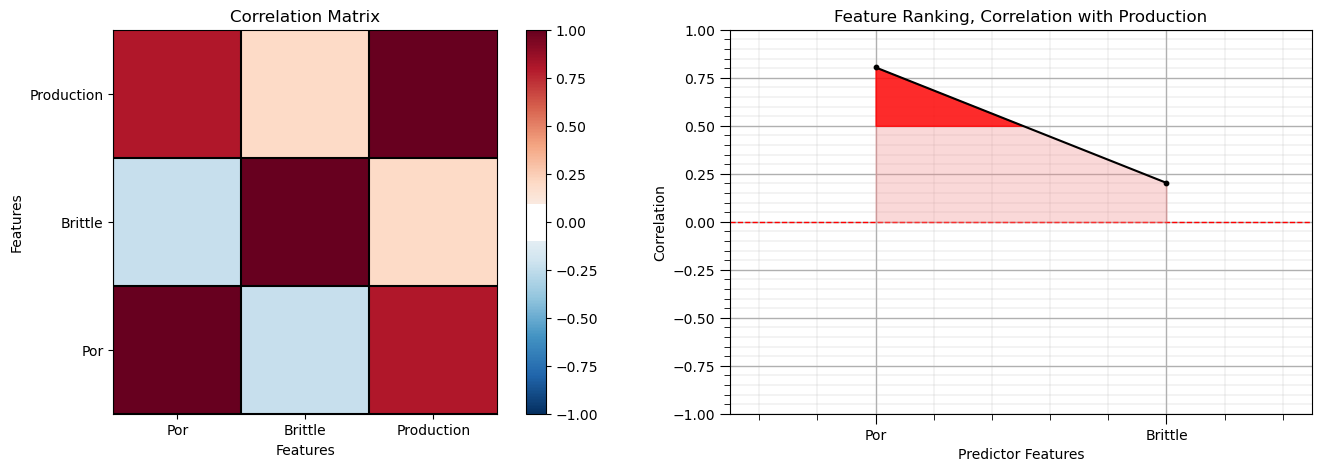

In [11]:
corr_matrix = df.corr()
correlation = corr_matrix.iloc[:,-1].values[:-1]

plt.subplot(121)
plot_corr(corr_matrix,'Correlation Matrix',1.0,0.1)           # using our correlation matrix visualization function
plt.xlabel('Features'); plt.ylabel('Features')

plt.subplot(122)
feature_rank_plot(Xname,correlation,-1.0,1.0,0.0,'Feature Ranking, Correlation with ' + yname,'Correlation',0.5)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.2, hspace=0.3); plt.show()

Note the 1.0 diagonal resulting from the correlation of each variable with themselves.  

This looks good.  There is a mix of correlation magnitudes. Of course, correlation coefficients are limited to degree of linear correlations.  

* Let's look at the matrix scatter plot to see the pairwise relationship between the features.

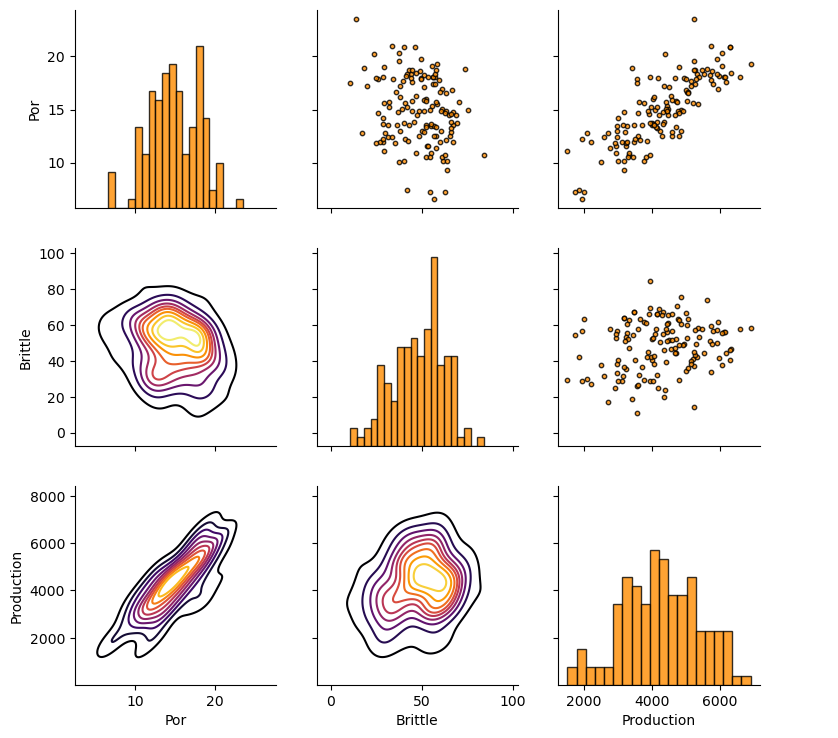

In [13]:
pairgrid = sns.PairGrid(df,vars=Xname+[yname])                # matrix scatter plots
pairgrid = pairgrid.map_upper(plt.scatter, color = 'darkorange', edgecolor = 'black', alpha = 0.8, s = 10)
pairgrid = pairgrid.map_diag(plt.hist, bins = 20, color = 'darkorange',alpha = 0.8, edgecolor = 'k')# Map a density plot to the lower triangle
pairgrid = pairgrid.map_lower(sns.kdeplot, cmap = plt.cm.inferno, 
                              alpha = 1.0, n_levels = 10)
pairgrid.add_legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.9, top=0.9, wspace=0.2, hspace=0.2); plt.show()

#### Train and Test Split

For convenience and simplicity we use scikit-learn's random train and test split.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=73073) # train and test split
df_train = pd.concat([X_train,y_train],axis=1)                # make one train DataFrame with both X and y (remove all other features)
df_test = pd.concat([X_test,y_test],axis=1)                   # make one testin DataFrame with both X and y (remove all other features)

#### Visualize the DataFrame

Visualizing the train and test DataFrame is useful check before we build our models.

* many things can go wrong, e.g., we loaded the wrong data, all the features did not load, etc.

We can preview by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). 

In [17]:
print('       Training DataFrame          Testing DataFrame')
display_sidebyside(df_train,df_test)                          # custom function for side-by-side DataFrame display

       Training DataFrame          Testing DataFrame


,Por,Brittle,Production
86,12.83,29.87,2089.258307
35,17.39,56.43,5803.596379
75,12.23,40.67,3511.348151
36,13.72,40.24,4004.849870
126,12.83,17.20,2712.836372
,Por,Brittle,Production
5,15.55,58.25,5353.761093
46,20.21,23.78,4387.577571
96,15.07,39.39,4412.135054
45,12.10,63.24,3654.779704


#### Summary Statistics for Tabular Data

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. 

* The describe command provides count, mean, minimum, maximum in a nice data table. 

In [19]:
print('            Training DataFrame                      Testing DataFrame')    # custom function for side-by-side summary statistics
display_sidebyside(df_train.describe().loc[['count', 'mean', 'std', 'min', 'max']],df_test.describe().loc[['count', 'mean', 'std', 'min', 'max']])

            Training DataFrame                      Testing DataFrame


,Por,Brittle,Production
count,105.000000,105.000000,105.000000
mean,14.859238,48.861143,4238.554591
std,3.057228,14.432050,1087.707113
min,7.220000,10.940000,1517.373571
max,23.550000,84.330000,6907.632261
,Por,Brittle,Production
count,35.000000,35.000000,35.000000
mean,15.011714,46.798286,4378.913131
std,3.574467,13.380910,1290.216113
min,6.550000,20.120000,1846.027145


It is good that we checked the summary statistics.

* there are no obvious issues
* check out the range of values for each feature to set up and adjust plotting limits. See above.

#### Visualize the Train and Test Splits

Let's check the consistency and coverage of training and testing with histograms and scatter plots.

* check to make sure the training and testing cover the range of possible feature combinations
* ensure we are not extrapolating beyond the training data with the testing cases

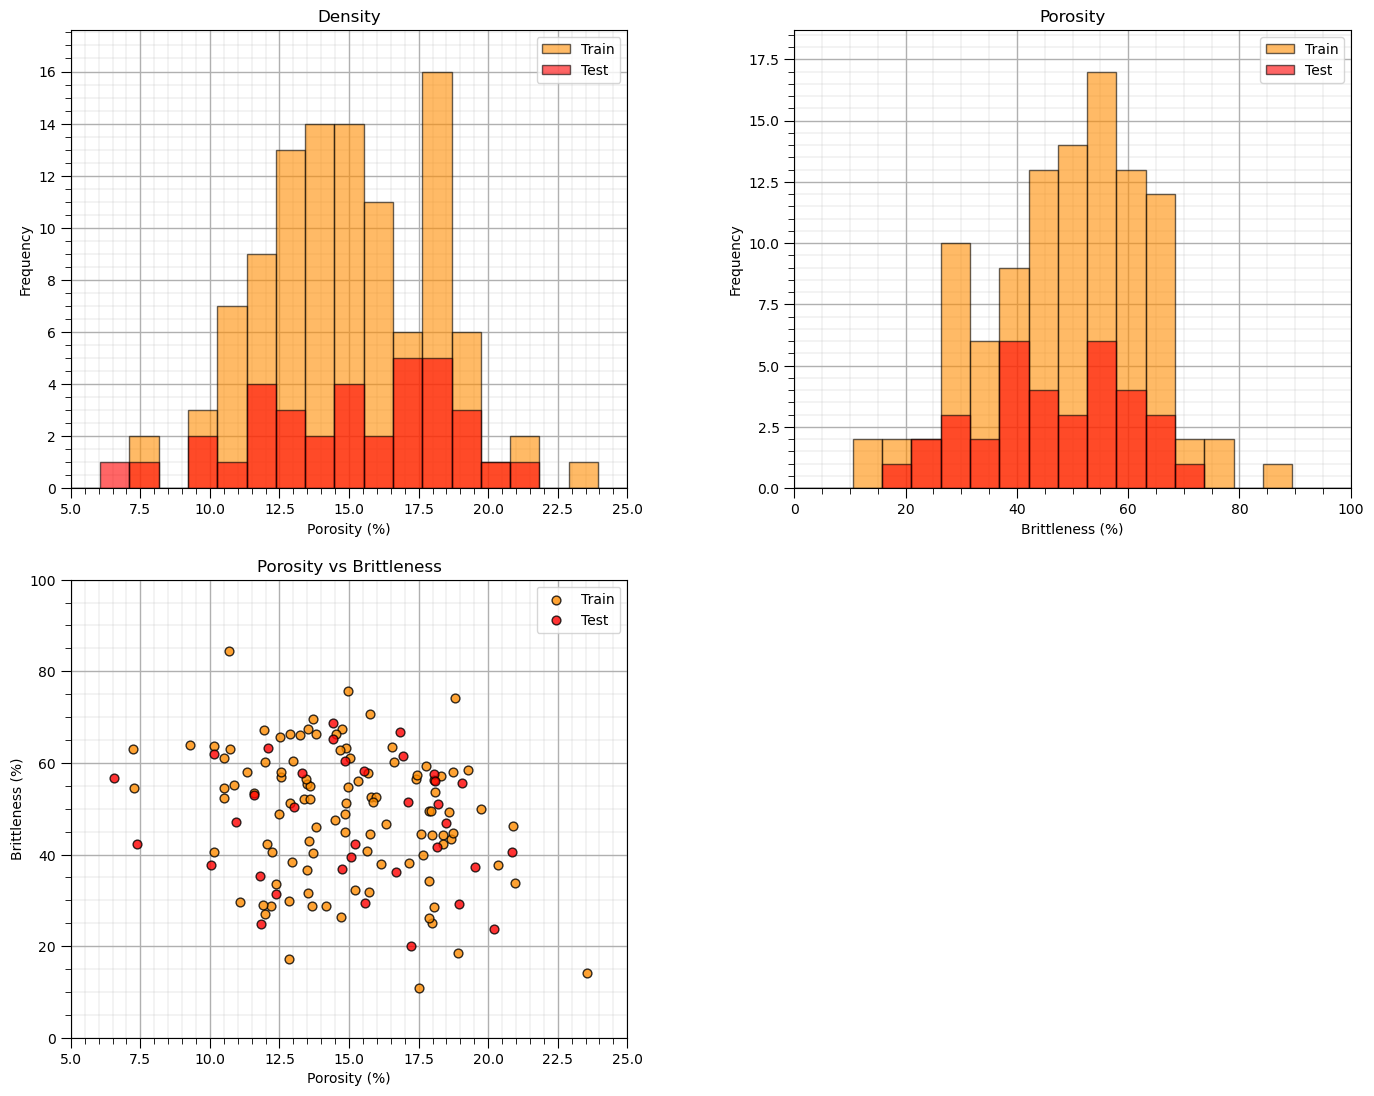

In [21]:
nbins = 20                                                    # number of histogram bins

plt.subplot(221)                                              # predictor feature #1 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[Xname[0]],weights=None,bins=np.linspace(Xmin[0],Xmax[0],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(Xlabelunit[0]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Density'); add_grid()  
plt.xlim([Xmin[0],Xmax[0]]); plt.legend(loc='upper right')   

plt.subplot(222)                                              # predictor feature #2 histogram
freq1,_,_ = plt.hist(x=df_train[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='darkorange',density=False,label='Train')
freq2,_,_ = plt.hist(x=df_test[Xname[1]],weights=None,bins=np.linspace(Xmin[1],Xmax[1],nbins),alpha = 0.6,
                     edgecolor='black',color='red',density=False,label='Test')
max_freq = max(freq1.max()*1.10,freq2.max()*1.10)
plt.xlabel(Xlabelunit[1]); plt.ylabel('Frequency'); plt.ylim([0.0,max_freq]); plt.title('Porosity'); add_grid()  
plt.xlim([Xmin[1],Xmax[1]]); plt.legend(loc='upper right')   

plt.subplot(223)                                              # predictor features #1 and #2 scatter plot
plt.scatter(df_train[Xname[0]],df_train[Xname[1]],s=40,marker='o',color = 'darkorange',alpha = 0.8,edgecolor = 'black',zorder=10,label='Train')
plt.scatter(df_test[Xname[0]],df_test[Xname[1]],s=40,marker='o',color = 'red',alpha = 0.8,edgecolor = 'black',zorder=10,label='Test')
plt.title(Xlabel[0] + ' vs ' +  Xlabel[1])
plt.xlabel(Xlabelunit[0]); plt.ylabel(Xlabelunit[1])
plt.legend(); add_grid(); plt.xlim([Xmin[0],Xmax[0]]); plt.ylim([Xmin[1],Xmax[1]])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

Sometimes I find it more convenient to compare distributions by looking at CDF's instead of histograms.
* we avoid the arbitrary choice of histogram bin size, because CDF's are at the data resolution.

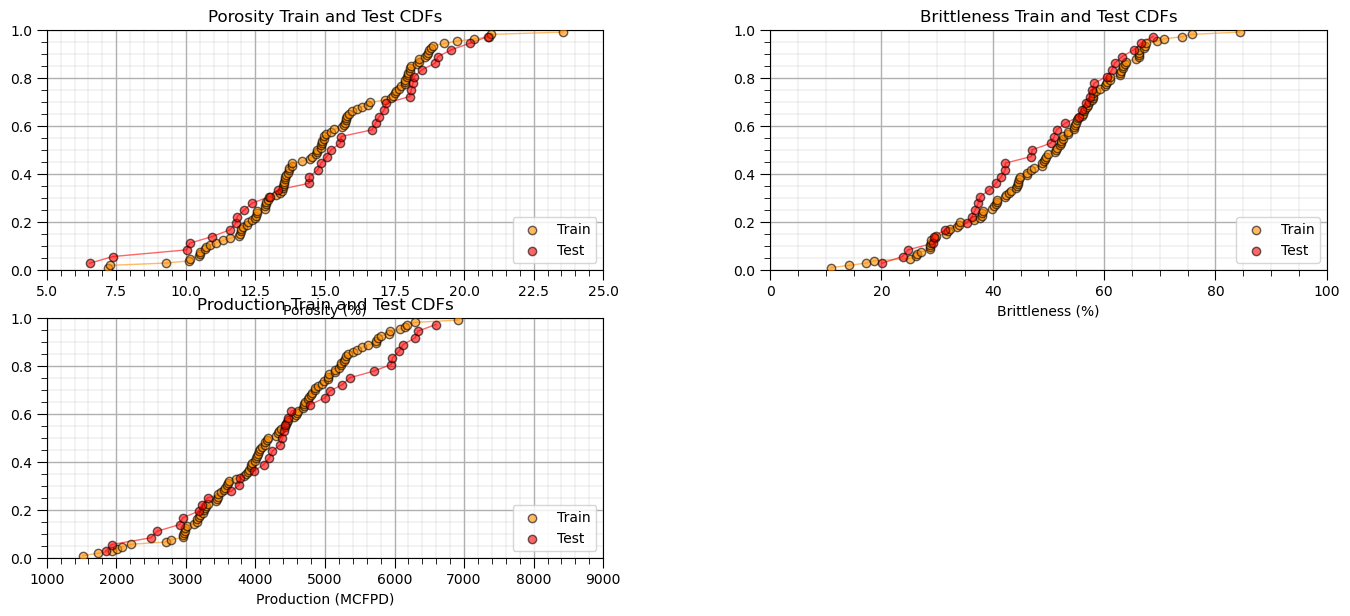

In [23]:
plt.subplot(221)                                              # predictor feature #1 CDF
plot_CDF(X_train[Xname[0]],'darkorange',alpha=0.6,lw=1,ls='solid',label='Train')
plot_CDF(X_test[Xname[0]],'red',alpha=0.6,lw=1,ls='solid',label='Test')
plt.xlabel(Xlabelunit[0]); plt.xlim(Xmin[0],Xmax[0]); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(Xlabel[0] + ' Train and Test CDFs')

plt.subplot(222)                                              # predictor feature #2 CDF
plot_CDF(X_train[Xname[1]],'darkorange',alpha=0.6,lw=1,ls='solid',label='Train')
plot_CDF(X_test[Xname[1]],'red',alpha=0.6,lw=1,ls='solid',label='Test')
plt.xlabel(Xlabelunit[1]); plt.xlim(Xmin[1],Xmax[1]); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(Xlabel[1] + ' Train and Test CDFs')

plt.subplot(223)                                              # response feature CDF
plot_CDF(y_train[yname],'darkorange',alpha=0.6,lw=1,ls='solid',label='Train')
plot_CDF(y_test[yname],'red',alpha=0.6,lw=1,ls='solid',label='Test')
plt.xlabel(ylabelunit); plt.xlim(ymin,ymax); plt.ylim([0,1]); add_grid(); plt.legend(loc='lower right')
plt.title(ylabel + ' Train and Test CDFs')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.3, hspace=0.2)
#plt.savefig('Test.pdf', dpi=600, bbox_inches = 'tight',format='pdf')   
plt.show()

Once again, the distributions are well behaved, 

* we cannot observe obvious gaps nor truncations.
* check coverage of the train and test data

Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.

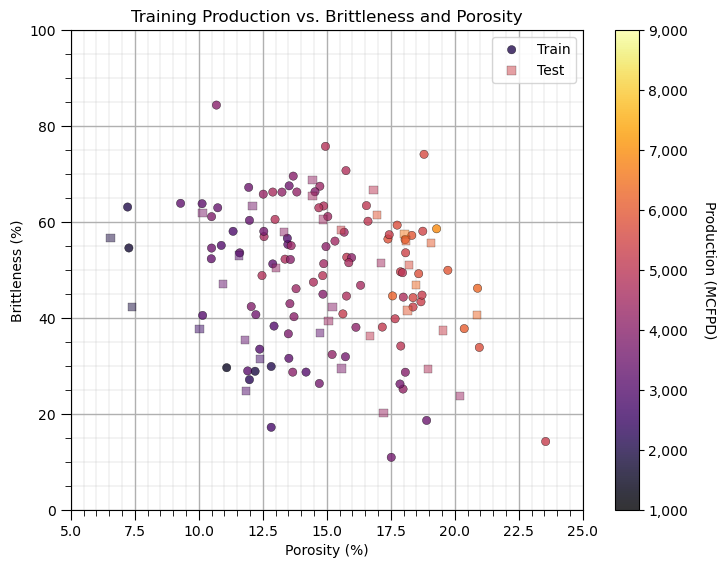

In [25]:
plt.subplot(111)                                              # visualize the train and test data in predictor feature space
im = plt.scatter(X_train[Xname[0]],X_train[Xname[1]],s=None, c=y_train[yname], marker='o', cmap=cmap, 
    norm=None, vmin=ymin, vmax=ymax, alpha=0.8, linewidths=0.3, edgecolors="black", label = 'Train')
plt.scatter(X_test[Xname[0]],X_test[Xname[1]],s=None, c=y_test[yname], marker='s', cmap=cmap, 
    norm=None, vmin=ymin, vmax=ymax, alpha=0.5, linewidths=0.3, edgecolors="black", label = 'Test')
plt.title('Training ' + ylabel + ' vs. ' + Xlabel[1] + ' and ' + Xlabel[0]); 
plt.xlabel(Xlabel[0] + ' (' + Xunit[0] + ')'); plt.ylabel(Xlabel[1] + ' (' + Xunit[1] + ')')
plt.xlim(Xmin[0],Xmax[0]); plt.ylim(Xmin[1],Xmax[1]); plt.legend(loc = 'upper right'); add_grid()
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label(ylabel + ' (' + yunit + ')', rotation=270, labelpad=20)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(comma_format))

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.2, hspace=0.2); plt.show()

This problem looks complicated and could not be modeled with simple linear regression. It appears that there are non-linearities. Let's use a simple nonparametric model, decision tree.

#### Instantiate, Fit and Predict with scikit-learn

Let's build our predictive machine learning model, by instantiate, fit and predict with scikit-learn.

* **instantiate** the model object with the hyperparameters, k-nearest neighbours 
* **fit** by training the model with the training data, we use the member function fit 
* **predict** with the trained model. After fit is run, predict is available to make predictions

#### Training a Decision Tree (Regression Tree)

Now we are ready to run the DecisionTreeRegressor command to build our regression tree to predict our response feature given our 2 predictor features (recall we limit ourselves here to 2 predictor features for ease of visualization).  

* We will use our two functions defined above to visualize the decision tree prediction over the feature space and the cross plot of actual and estimated production for the training data along with three model metrics from the sklearn.metric module.

**Hyper Parameters** - we constrain our tree complexity with:

* *max_leaf_nodes* - maximum number of regions, also called terminal or lead nodes in the decision tree
* *max_depth* - maximum number of levels, e.g., max_depth = 1 is a stump tree with only 1 decision and two regions
* *min_samples_leaf* - minimum number of data in a new region, good constraint to ensure each region has enough data to make a reasonable estimate

For now lets just try out some hyperparameters.

##### Underfit Decision Tree Model

Let's use too few regions, set max_leaf_nodes too small and see the resulting decision tree model.

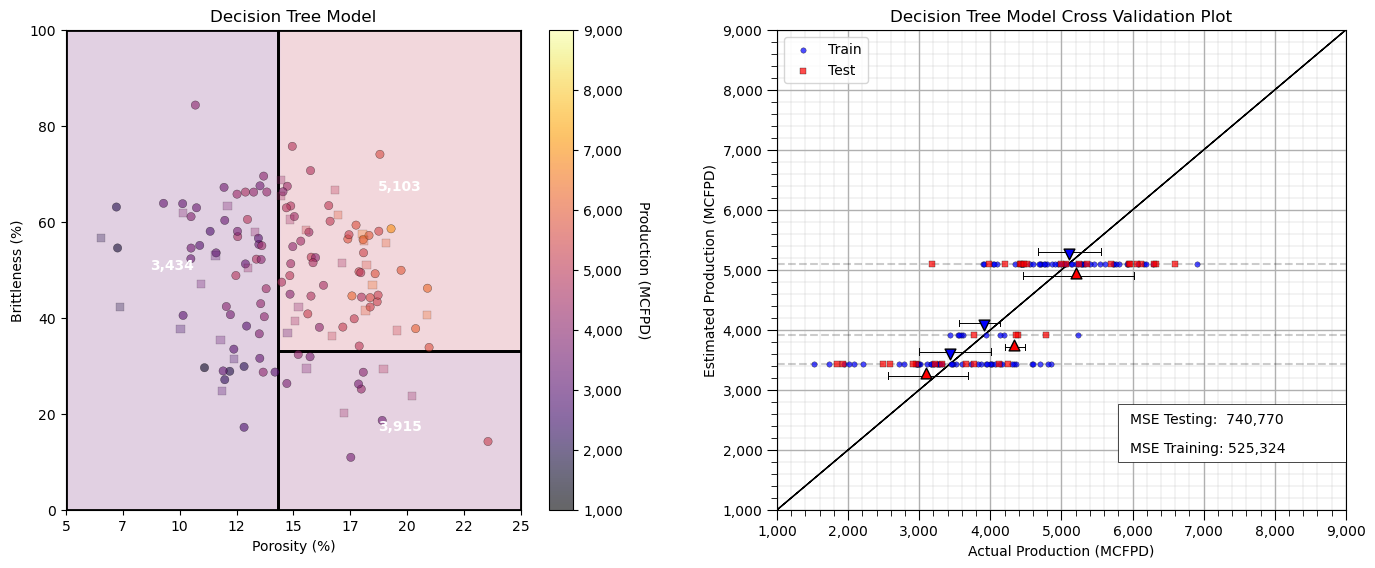

In [27]:
max_leaf_nodes = 3; max_depth = 9; min_samples_leaf = 1      # hyperparameters

tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes,max_depth = max_depth,min_samples_leaf = min_samples_leaf)
tree_model = tree_model.fit(X_train.values, y_train.values)

plt.subplot(121)                                              # visualize, data, and decision tree regions and predictions
visualize_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model',Xname,yname,Xlabelunit,ylabelunit) 
    
plt.subplot(122)                                              # cross validation with conditional statistics plot
check_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model Cross Validation Plot',)
        
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.25, hspace=0.2); plt.show()

This model is very much underfit, it is too simple to fit the shape of the prediction problem. Here's some more information on the plot.

See the horizontal lines on the plot of estimated vs. actual production (plot on the bottom)? 

* That is expected as the regression tree estimates with the average of the data in each region of the feature space (terminal node). 

* To further assess the model performance, I have included the actual response P10, mean and P90 for each leaf node, region for both training and testing.

* underfit predictive machine learning models have poor accuracy and training and testing.

If we have a more complicated tree with more terminal nodes then there would be more lines. 

##### Overfit Decision Tree Model

Let's use too many regions, set max_leaf_nodes too large and see the resulting decision tree model.

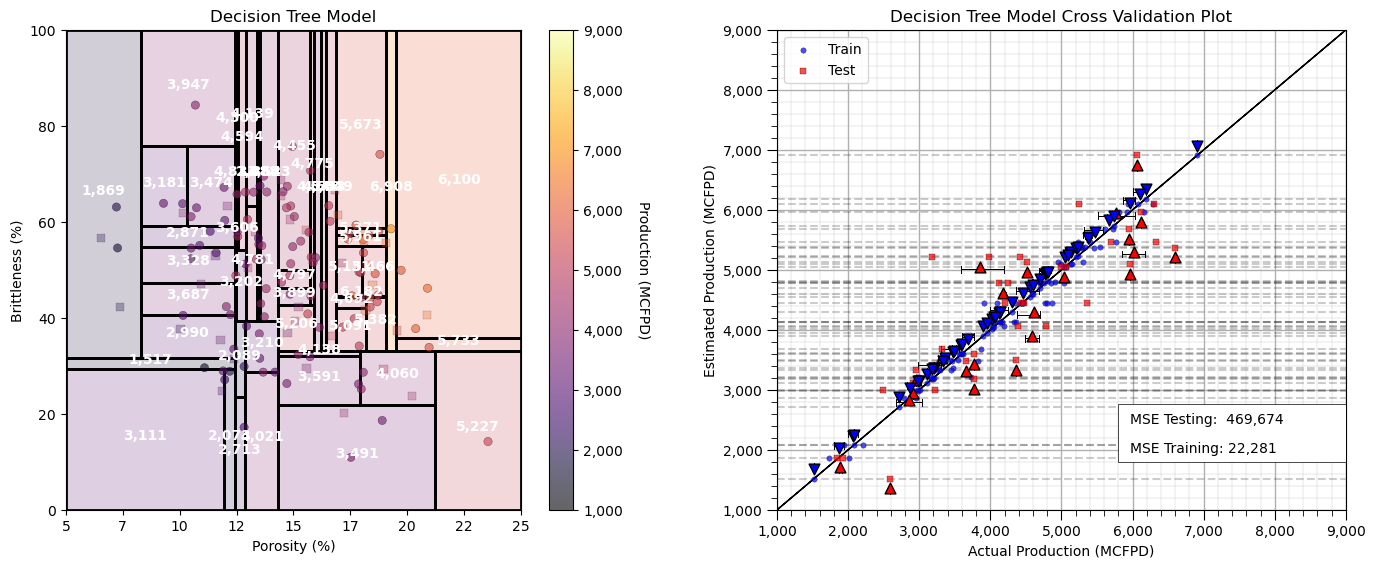

In [29]:
max_leaf_nodes = 50; max_depth = 9; min_samples_leaf = 1     # hyperparameters

tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes,max_depth = max_depth,min_samples_leaf = min_samples_leaf)
tree_model = tree_model.fit(X_train.values, y_train.values)

plt.subplot(121)                                              # visualize, data, and decision tree regions and predictions
visualize_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model',Xname,yname,Xlabelunit,ylabelunit) 
    
plt.subplot(122)                                              # cross validation with conditional statistics plot
check_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model Cross Validation Plot',)
        
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.25, hspace=0.2); plt.show()

Now we have an overfit predictive machine learning model.

* too much complexity and flexibility
* we are fitting the noise in the data
* good accuracy in training, but poor accuracy in testing

It is instructive to observe the decision tree model over the feature space as we incrementally add terminal nodes. We can graphically observe the hierarchical binary splitting quite clearly. 

* Let's visualize from simple complicated models.

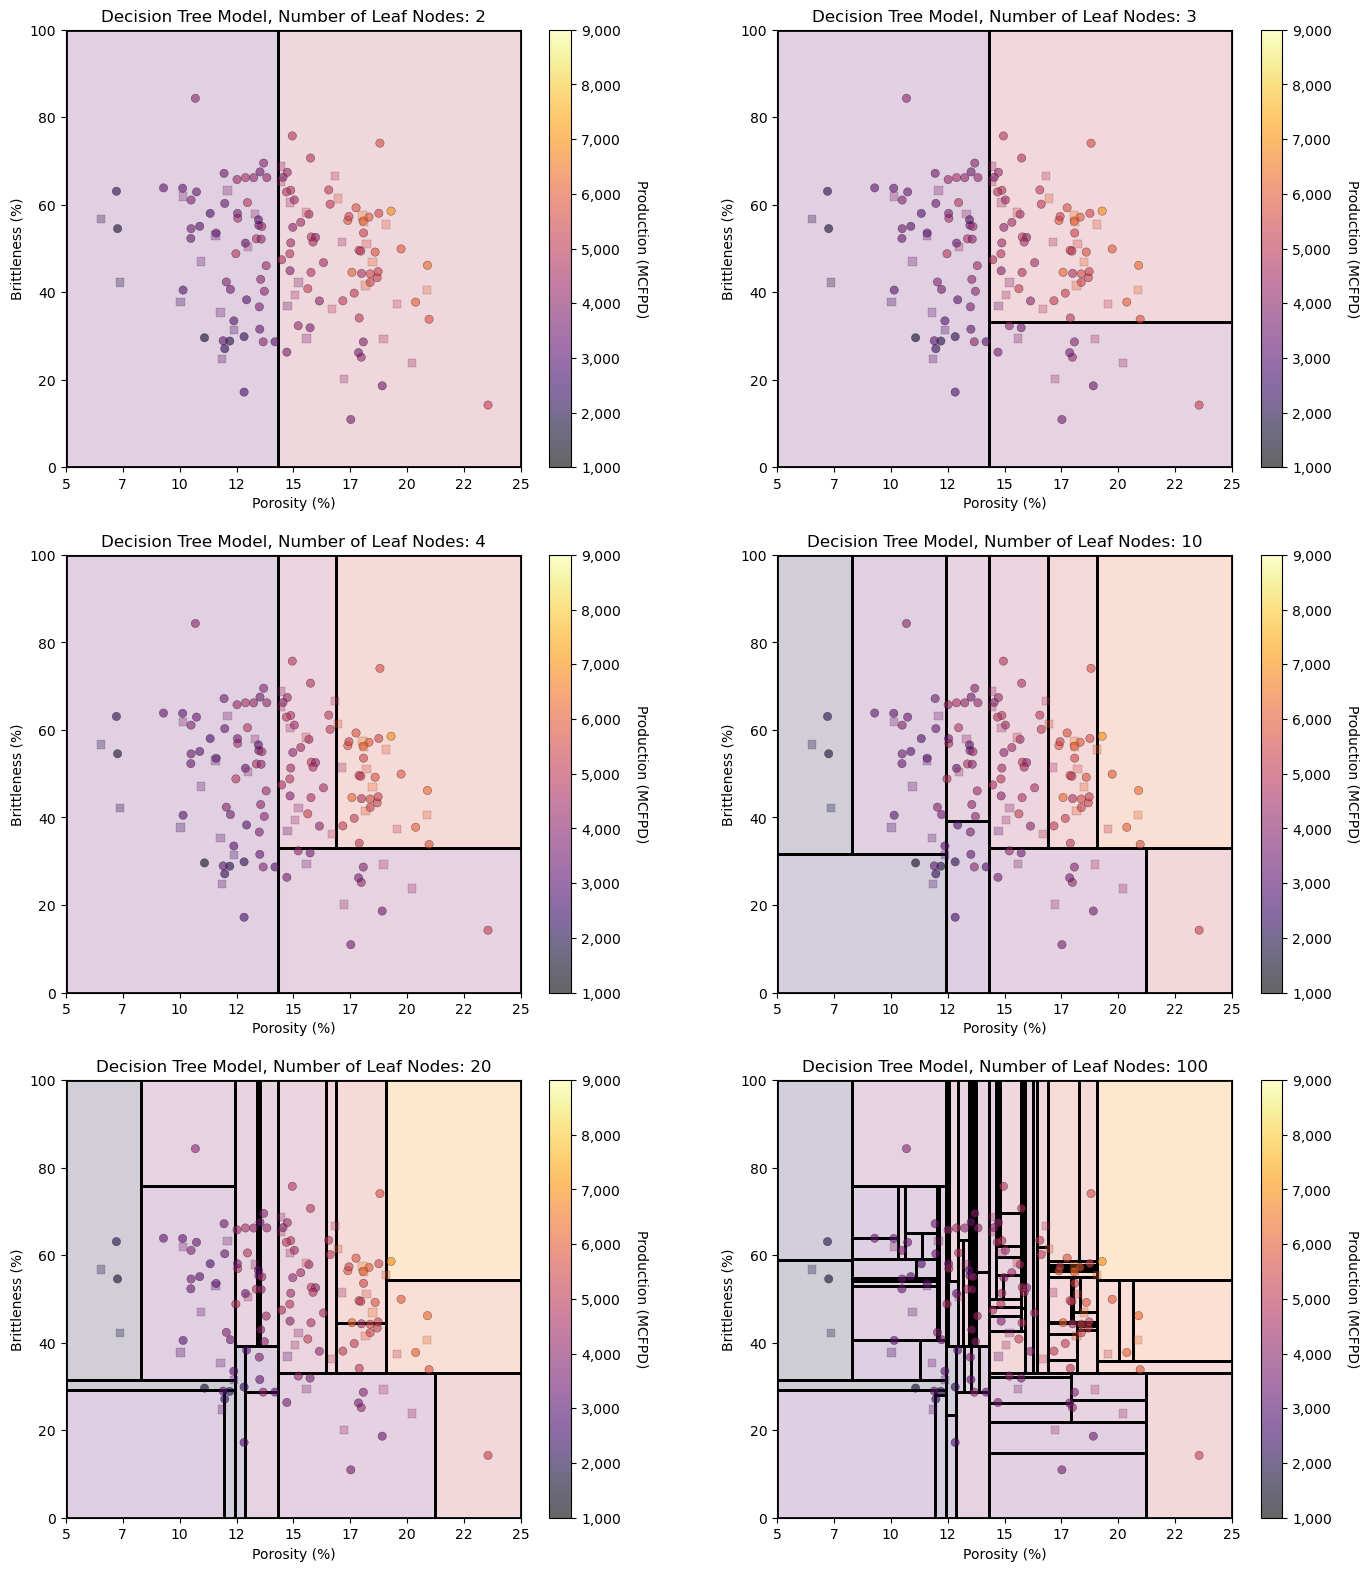

In [31]:
leaf_nodes_list = [2,3,4,10,20,100]

for inode,leaf_nodes in enumerate(leaf_nodes_list):

    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes = leaf_nodes)
    tree_model = tree_model.fit(X_train.values, y_train.values)

    plt.subplot(3,2,inode+1)                                         # visualize, data, and decision tree regions and predictions
    visualize_tree_model(tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],1000,9000,'Decision Tree Model, Number of Leaf Nodes: ' + str(leaf_nodes),Xname,yname,Xlabelunit,ylabelunit,annotate=False)   

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.1, wspace=0.25, hspace=0.2); plt.show()

It may be useful to look at a decision tree model and the associated decision tree, side-by-side.

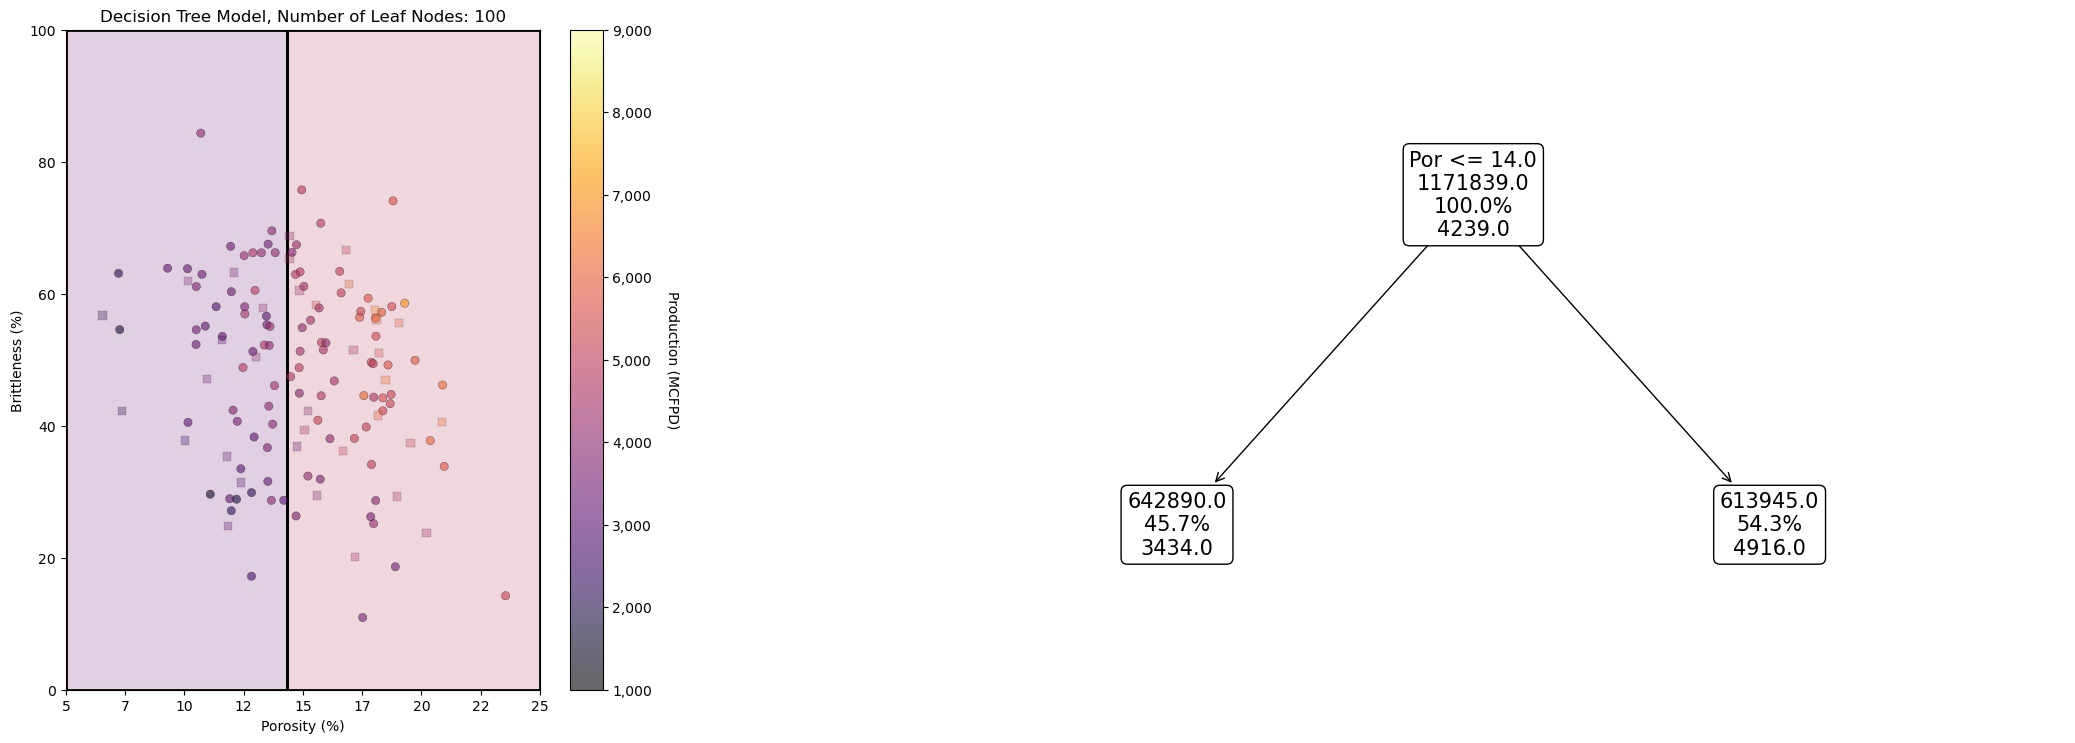

In [180]:
leaf_nodes_viz = 2

tree_model_viz = tree.DecisionTreeRegressor(max_leaf_nodes = leaf_nodes_viz).fit(X_train.values, y_train.values)

fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2])  # 1 row, 3 columns with 1:2 width ratio

ax1 = fig.add_subplot(gs[0])                         # visualize, data, and decision tree regions and predictions                                      
visualize_tree_model(tree_model_viz,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
        y_train[yname],y_test[yname],1000,9000,'Decision Tree Model, Number of Leaf Nodes: ' + str(leaf_nodes),Xname,yname,
        Xlabelunit,ylabelunit,annotate=False)   

ax2 = fig.add_subplot(gs[1:])                                  # visualize, data, and decision tree regions and predictions
_ = tree.plot_tree(tree_model_viz,ax = ax2,feature_names=list(Xname),class_names=list(yname),filled=False,label='none',rounded=True,precision=0,
                  proportion=True,max_depth=4,fontsize=15)

plt.tight_layout()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.25, hspace=0.2); plt.show()

How do we find the best hyperparameters, for the best complexity for optimum prediction accuracy for testing? That is hyperparameter tuning.

#### Tuning a Decision Tree (Regression Tree)

Let's perform hyperparameter tuning. To do this we,

1. See the range of possible hyperparameter values.
2. Loop over the range of possible hyperparameter values.
   * Train on the training data with the current hyperparameter values.
   * Predict at the testing data
   * Summarize the error over all the testing data
3. Select the hyperparameters that minimize the error at for the testing data

When I teach this to my students, I suggest that this is a model dress rehearsal. We add value by making predictions for cases not used to train the model. We want the model that performs best for cases not in the training, so we are simulating real world use of the model!

Now let's do hyperparameter tuning 'by-hand', by varying the decision tree complexity and find the complexity that minimizes MSE in testing
* for simplicity the code below loops only over the maximum leaf nodes hyperparameter
* we set minimum number of samples to 1, and maximum depth to 9 to ensure that these hyperparameters will not have any impact (we set them to very complicated so they don't limit the model complexity)

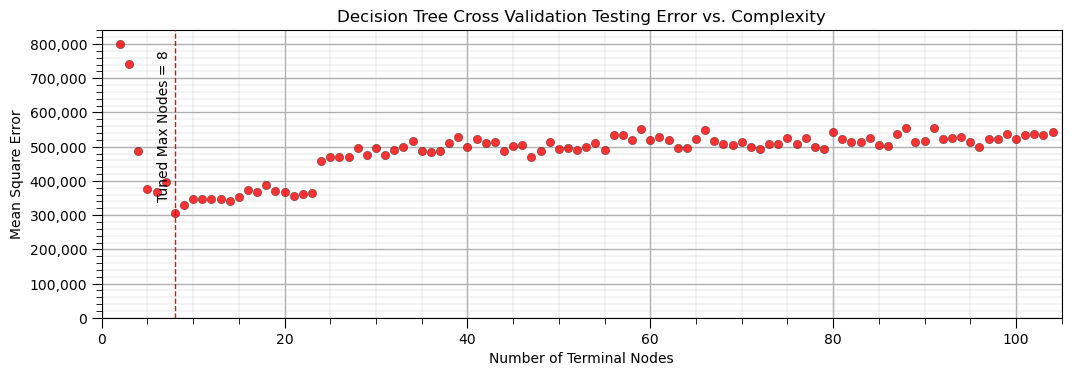

In [33]:
trees = []; MSE_CV = []; node_CV = []

inode = 2
while inode < len(X_train):                                   # loop over the hyperparameter, train with training and test with testing
    tree_model = tree.DecisionTreeRegressor(min_samples_leaf=1,max_leaf_nodes=inode).fit(X_train.values, y_train.values)
    trees.append(tree_model)
    predict_train = tree_model.predict(np.c_[X_test[Xname[0]],X_test[Xname[1]]]) 
    MSE_CV.append(metrics.mean_squared_error(y_test[yname],predict_train))   
    all_nodes = tree_model.tree_.node_count             
    decision_nodes = len([x for x in tree_model.tree_.feature if x != _tree.TREE_UNDEFINED]); terminal_nodes = all_nodes - decision_nodes
    node_CV.append(terminal_nodes); inode+=1

plt.subplot(111)
plt.scatter(node_CV,MSE_CV,s=None,c='red',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.8,linewidths=0.3,
            edgecolors="black",zorder=20)
tuned_node = node_CV[np.argmin(MSE_CV)]; max_MSE_CV = np.max(MSE_CV)
plt.vlines(tuned_node,0,1.05*max_MSE_CV,lw=1.0,ls='--',color='red',zorder=10)
plt.annotate('Tuned Max Nodes = ' + str(tuned_node),(tuned_node-2,3.5e5),rotation=90,zorder=30)
plt.title('Decision Tree Cross Validation Testing Error vs. Complexity'); plt.xlabel('Number of Terminal Nodes'); plt.ylabel('Mean Square Error')
plt.xlim(0,len(X_train)); plt.ylim(0,1.05*max_MSE_CV); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.6, wspace=0.2, hspace=0.2); plt.show()

It is useful to evaluate the performance of our tree by observing the accuracy vs. complexity, with a minimum due to the model variance and model bias trade-off. 

For a more robust result, let's try k-fold cross validation. sklearn has a built in cross validation method called cross_val_score that we can use to:

1. Apply k-fold approach with iterative separation of training and testing data
2. With k=5, we have 20% withheld for testing for each fold
3. Automate the model construction, looping over folds and averaging the metric of interest

Let's try it out on our trees with variable number of terminal nodes.  Note the cross validation is set to use 4 processors, but still will likely take a couple of minutes to run.

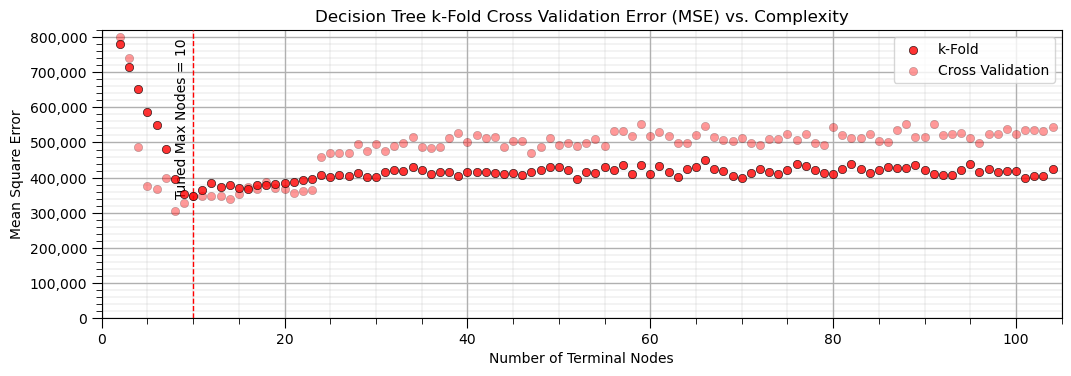

In [35]:
MSE_kF = []; node_kF = []                                     # k-fold iteration code modified from StackOverFlow by Dimosthenis

inode = 2
while inode < len(X_train):
    tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=inode).fit(X_train.values, y_train.values)
    scores = cross_val_score(estimator=tree_model, X= np.c_[df[Xname[0]],df[Xname[1]]],y=df[yname], cv=5, n_jobs=4,
        scoring = "neg_mean_squared_error")                   # perform 4-fold cross validation
    MSE_kF.append(abs(scores.mean()))
    all_nodes = tree_model.tree_.node_count   
    decision_nodes = len([x for x in tree_model.tree_.feature if x != _tree.TREE_UNDEFINED]); terminal_nodes = all_nodes - decision_nodes
    node_kF.append(terminal_nodes); inode+=1

tuned_node_kF = node_kF[np.argmin(MSE_kF)]; max_MSE_kF = np.max(MSE_kF)  
plt.subplot(111)
plt.vlines(tuned_node_kF,0,1.05*max_MSE_kF,lw=1.0,ls='--',color='red',zorder=10)
plt.annotate('Tuned Max Nodes = ' + str(tuned_node_kF),(tuned_node_kF-2,3.5e5),rotation=90,zorder=30)
plt.scatter(node_kF,MSE_kF,s=None,c="red",marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.8,
            linewidths=0.5, edgecolors="black",zorder=40,label='k-Fold')
plt.scatter(node_CV,MSE_CV,s=None,c='red',marker=None,cmap=None,norm=None,vmin=None,vmax=None,alpha=0.4,linewidths=0.3,
            edgecolors="black",zorder=20,label='Cross Validation')
plt.title('Decision Tree k-Fold Cross Validation Error (MSE) vs. Complexity'); plt.xlabel('Number of Terminal Nodes'); 
plt.ylabel('Mean Square Error'); plt.xlim(0,len(X_train)); plt.ylim(0,1.05*max_MSE_kF); add_grid()
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))
plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=0.6, wspace=0.2, hspace=0.2); plt.show()

The k-fold cross validation provides a smoother plot of MSE vs. the hyperparameter.

* this is accomplished by averaging the MSE over all the folds to reduce sensitivity of the metric to specific assignment of training and testing data

* all our train and test cross validation or k-fold cross validation was to get this one value, the model **hyperparameter**  

#### Build the Final Model

Now let's take that hyperparameter and train on all the data, this is our **final model**

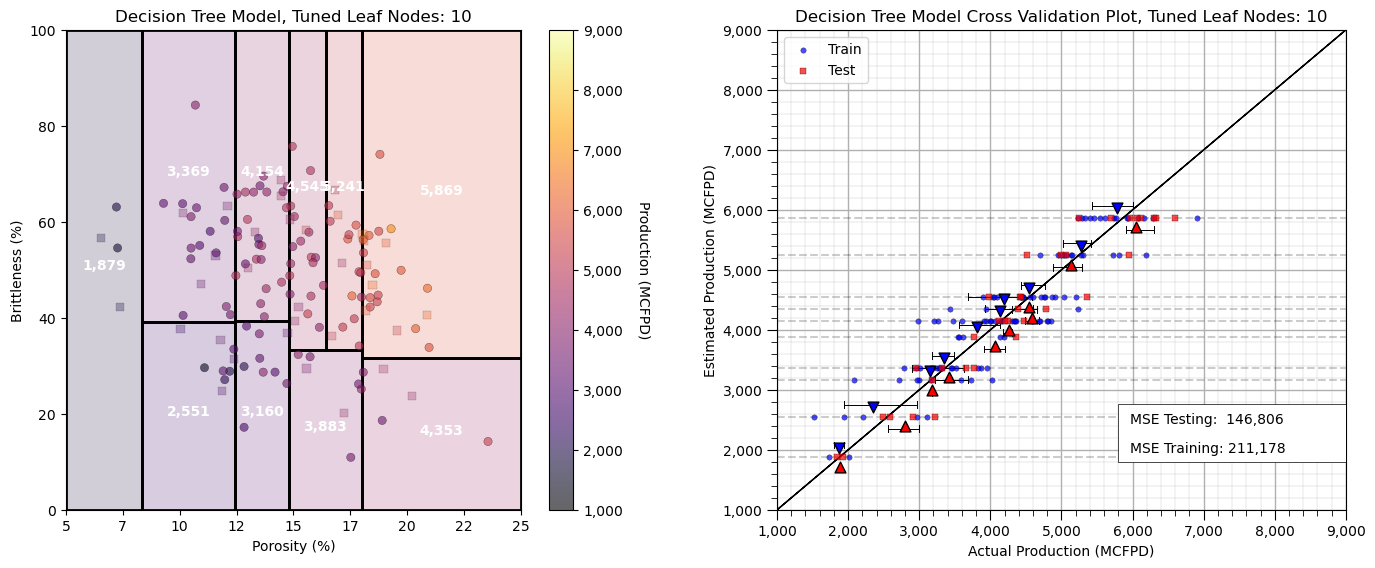

In [37]:
pruned_tree_model = tree.DecisionTreeRegressor(max_leaf_nodes=tuned_node_kF)
pruned_tree_model = pruned_tree_model.fit(X, y)               # re-train

plt.subplot(121)                                              # visualize, data, and decision tree regions and predictions
visualize_tree_model(pruned_tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model, Tuned Leaf Nodes: ' + str(tuned_node_kF),Xname,yname,
                    Xlabelunit,ylabelunit) # plots the data points and the decision tree prediction 
    
plt.subplot(122)                                              # cross validation with conditional statistics plot
check_tree_model(pruned_tree_model,X_train[Xname[0]],X_test[Xname[0]],X_train[Xname[1]],X_test[Xname[1]],Xmin,Xmax,
                    y_train[yname],y_test[yname],ymin,ymax,'Decision Tree Model Cross Validation Plot, Tuned Leaf Nodes: ' + 
                    str(tuned_node_kF),)
       
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.25, hspace=0.2); plt.show()

We have completed our predictive machine learning model. Now let's cover a couple more decision tree diagnostics. 

#### Interrogating Decision Trees

It may be useful to evaluate for any possible feature combination, the order of decision nodes that resulted in the specific prediction.  The following function provides the list of nodes that the prediction cases passes.

In [39]:
x1 = 7.0; x2 = 10.0                                          # the predictor feature values for the decision path

decision_path = pruned_tree_model.decision_path(np.c_[x1,x2])
print(decision_path)

  (0, 0)	1
  (0, 1)	1
  (0, 3)	1
  (0, 13)	1


#### Extracting the Decision Tree Prediction Model as a Function

Furthermore it may be useful to convert the decision tree to code, a nested set of 'if' statements.  

* This creates a portable model that could be copied and applied as a standalone function.  

Also, one could conveniently interrogate the code version of the tree.  

* We use the previously defined function to do this with our pruned tree.

In [41]:
tree_to_code(pruned_tree_model, list(Xname))                  # convert a decision tree to Python code, nested if statements

def tree(Por, Brittle):
  if Por <= 14.789999961853027:
    if Por <= 12.425000190734863:
      if Por <= 8.335000038146973:
        return [[1879.19091537]]
      elif Por > 8.335000038146973
        if Brittle <= 39.125:
          return [[2551.00021508]]
        elif Brittle > 39.125
          return [[3369.12903299]]
    elif Por > 12.425000190734863
      if Brittle <= 39.26500129699707:
        return [[3160.11022857]]
      elif Brittle > 39.26500129699707
        return [[4154.18334527]]
  elif Por > 14.789999961853027
    if Por <= 18.015000343322754:
      if Brittle <= 33.25:
        return [[3883.19381758]]
      elif Brittle > 33.25
        if Por <= 16.434999465942383:
          return [[4544.69777089]]
        elif Por > 16.434999465942383
          return [[5240.84146117]]
    elif Por > 18.015000343322754
      if Brittle <= 31.5600004196167:
        return [[4353.11874206]]
      elif Brittle > 31.5600004196167
        return [[5868.56369869]]


#### Decision Tree-based Feature Importance

Feature importance is calculated from a decision trees by summarizing the reduction in mean square error through inclusion of each feature and is summarized as:

$$
FI(x) = \sum_{t \in T_f} \frac{N_t}{N} \Delta_{MSE_t}
$$

where $T_f$ are all nodes with feature $x$ as the split, $N_t$ is the number of training samples reaching node $t$, $N$ is the total number of samples in the dataset and $\Delta_{MSE_t}$ is the reduction in MSE with the $t$ split.

Note, feature importance can be calculated in a similar manner to MSE above for the case of classification trees with **Gini Impurity**. 

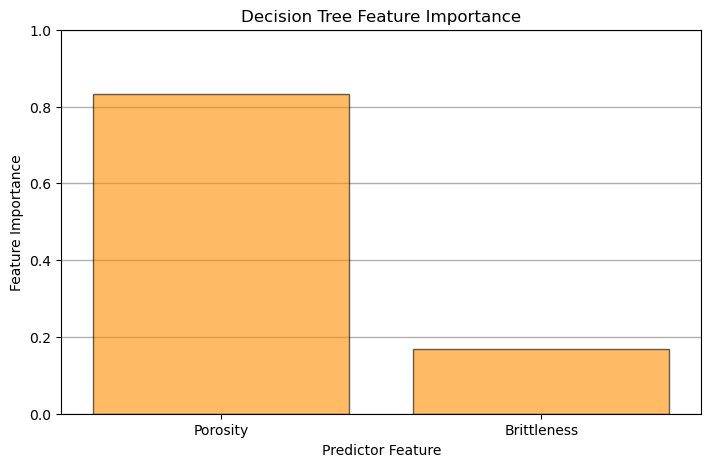

In [43]:
plt.subplot(111)                                              # plot the feature importance 
plt.title("Decision Tree Feature Importance")
plt.bar(Xlabel, pruned_tree_model.feature_importances_,edgecolor = 'black',
       color="darkorange",alpha = 0.6, align="center")
plt.xlim([-0.5,len(Xname)-0.5]); plt.ylim([0.,1.0])
plt.gca().yaxis.grid(True, which='major',linewidth = 1.0); plt.gca().yaxis.grid(True, which='minor',linewidth = 0.2) # add y grids
plt.xlabel('Predictor Feature'); plt.ylabel('Feature Importance')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1., top=0.8, wspace=0.2, hspace=0.5); plt.show()

#### Visualize the Model

Let's take a last look at the graphical representation of our pruned tree.  

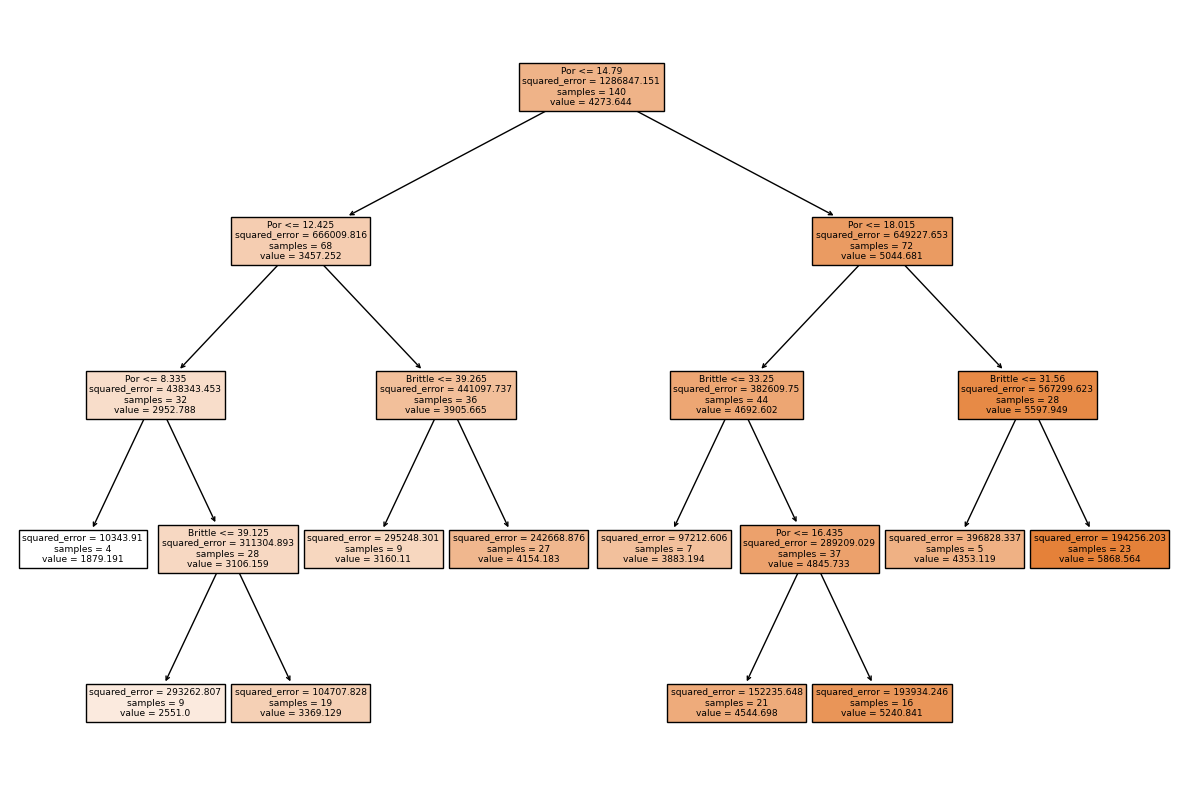

In [45]:
fig = plt.figure(figsize=(15,10))

_ = tree.plot_tree(pruned_tree_model,                         # plot the decision tree for model visualization
                   feature_names=list(Xname),  
                   class_names=list(yname),
                   filled=True)

#### Simple Code to Make a Decision Tree Machine and Calculate a Prediction

To support those just getting started, here's a minimal amount of code to:

* load the scikit-learn package for decision trees
* load data
* instantiate a decision tree with hyperparameters (no tuning is shown)
* train the decision tree with the training data
* make a prediction with the decision tree

In [47]:
from sklearn import tree                                      # import decision tree from scikit-learn
Xname = ['Por','Brittle']; yname='Production'                 # predictor features and response feature
x1 = 0.25; x2 = 0.3                                           # predictor values for the prediction
my_data = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV.csv") # load subsurface data table
my_tree = tree.DecisionTreeRegressor(max_leaf_nodes=26)       # instantiate tree with hyperparameters
my_tree = my_tree.fit(X.values,y.values)                      # train tree with training data
estimate = my_tree.predict([[x1,x2]])[0]                      # make a prediction (no tuning shown)
print('Estimated ' + ylabel + ' for ' + Xlabel[0] + ' = ' + str(x1) + ' and ' + Xlabel[1] + ' = ' + str(x2)  + ' is ' + str(round(estimate,1)) + ' ' + yunit) # print results

Estimated Production for Porosity = 0.25 and Brittleness = 0.3 is 1879.2 MCFPD


#### Machine Learning Pipelines for Clean, Compact Machine Learning Code

Pipelines are a scikit-learn class that allows for the encapsulation of a sequence of data preparation and modeling steps

* then we can treat the pipeline as an object in our much condensed workflow

The pipeline class allows us to:

* improve code readability and to keep everything straight

* build complete workflows with very few lines of readable code 

* avoid common workflow problems like data leakage, testing data informing model parameter training 

* abstract common machine learning modeling and focus on building the best model possible


The fundamental philosophy is to treat machine learning as a combinatorial search to find the best model (AutoML)

For more information see my recorded lecture on [Machine Learning Pipelines](https://www.youtube.com/watch?v=tYrPs8s1l9U&list=PLG19vXLQHvSAufDFgZEFAYQEwMJXklnQV&index=5) and a well-documented demonstration [Machine Learning Pipeline Workflow](http://localhost:8892/notebooks/OneDrive%20-%20The%20University%20of%20Texas%20at%20Austin/Courses/Workflows/PythonDataBasics_Pipelines.ipynb).

In [49]:
pipe_tree = Pipeline([                                        # the machine learning workflow as a pipeline object

    ('tree', tree.DecisionTreeRegressor())
])

params = {                                                    # the machine learning workflow method's parameters to search
    'tree__max_leaf_nodes': np.arange(2,len(X),1,dtype = int),
}

KF_tuned_tree = GridSearchCV(pipe_tree,params,scoring = 'neg_mean_squared_error', # hyperparameter tuning w. grid search k-fold cross validation 
                             cv=KFold(n_splits=5,shuffle=False),refit = True)
KF_tuned_tree.fit(X,y)                                        # tune and train the model

print('Tuned hyperparameter: max_leaf_nodes = ' + str(KF_tuned_tree.best_params_))

estimate = KF_tuned_tree.predict([[x1,x2]])[0]                # make a prediction (no tuning shown)
print('Estimated ' + ylabel + ' for ' + Xlabel[0] + ' = ' + str(x1) + ' and ' + Xlabel[1] + ' = ' + str(x2)  + ' is ' + str(round(estimate,1)) + ' ' + yunit) # print results

Tuned hyperparameter: max_leaf_nodes = {'tree__max_leaf_nodes': 10}
Estimated Production for Porosity = 0.25 and Brittleness = 0.3 is 1879.2 MCFPD


#### Comments

This was a basic treatment of decision tree. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

